In [54]:
include("../cliff7.jl")
using PyPlot

In [56]:
swap = Clifford(
    Bool[
        0 0 0 0 1 0 0 0;
        0 0 0 0 0 1 0 0;
        0 0 1 0 0 0 0 0;
        0 0 0 1 0 0 0 0;
        1 0 0 0 0 0 0 0;
        0 1 0 0 0 0 0 0;
        0 0 0 0 0 0 1 0;
        0 0 0 0 0 0 0 1],
    Bool[0, 0, 0, 0, 0, 0, 0, 0]
)

Clifford(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], [0, 0, 0, 0, 0, 0, 0, 0])

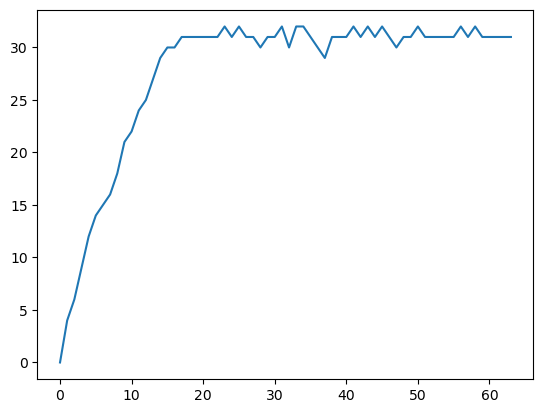

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000007C4A370>

In [58]:
Random.seed!(9)

n = 64
n_step = 64
n_average = 1

result = zeros(n_step)

for _ in 1:n_average
    state = all_up(n)
    for t in 1:n_step
        result[t] += right_ee_on_all_cuts(state)[1+div(n,2)]
        for ini in [1, 3]
            for i in ini:4:n
                clifford = random_cc_clifford(4)
                clifford_action!(clifford, state, [i, i%n+1, (i+1)%n+1, (i+2)%n+1])
                if rand() < 0.2
                    clifford_action!(swap, state, [i, i%n+1, (i+1)%n+1, (i+2)%n+1])
                end
            end
        end
    end
end

result /= n_average

plot(result)